In [2]:
import sys
sys.path.insert(1, '../functions')
from gk import gk
from mwrko import mwrko
from gko import gko
from method import method
from method2 import method2
from compute_sin2 import compute_sin2
import math 

In [3]:
# importing necessary libraries
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from itertools import permutations

# Synthetic Experiment: Convergence Rate (Not considered)

#### GK

$||x_k - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{m} \right) ^k ||x_0 - x^*||^2$ or
$||x_k - x^*||^2 \leq \Pi^{k-1}_{j = 0} \left ( 1 - \frac{\sigma^2_\min (A)}{\gamma_{k+1}} \right) ||x_0 - x^*||^2$ where $\gamma_{k+1} = \frac{||Ax_{k+1}-b||^2}{||Ax_{k+1}-b||^2_{\infty}}$. In this experiment, we are using first convergence rate for GK.

#### GKO and MWRKO

For k = 1: $$||x_1 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{m} \right) ||x_0 - x^*||^2$$

For k = 2: $$||x_2 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{ ( \max_i \sin^2\theta_i )(m-1)} \right)||x_1 - x^*||^2$$

For k > 2:

**GKO:** $$||x_{k+1} - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{\max_i \sin^2\theta_i} \right)||x_k - x^*||^2$$

**MWRKO:** $$||x_2 - x^*||^2 \leq \left ( 1 - \frac{\sigma^2_\min (A)}{ ( \max_i \sin^2\theta_i )(m-2)} \right) ||x_k - x^*||^2$$

## Gaussian System

In [4]:
# setting up data
A = np.random.randn(5000,500)
A = normalize(A, axis=1, norm='l2')
m,n = A.shape
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [5]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Fixnd the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

In [5]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [6]:
# Run algorithms
#gk_gaussian = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gaussian = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
#mwrko_gaussian = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0.025518216391635675
1937.4416623492225
0.00240773741473163

0.012014506857291569
1963.2380117015034
0.002376100478645035

0.015752731971910346
2100.3216510543893
0.0022210173270157227

0.022561269199109547
2066.144953181492
0.002257755813363935

0.019017498587703976
2125.5412801117104
0.002194664870988957



In [7]:
S2_min

4.664850779298069

In [8]:
gko_gaussian = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2065.4925106516116
0.002281222306482323

1998.3256137402839
0.0023578978104331185

2321.4043343699245
0.0020297401531515287

2274.830637498763
0.002071295995182936

2292.951775944428
0.002054926596626701



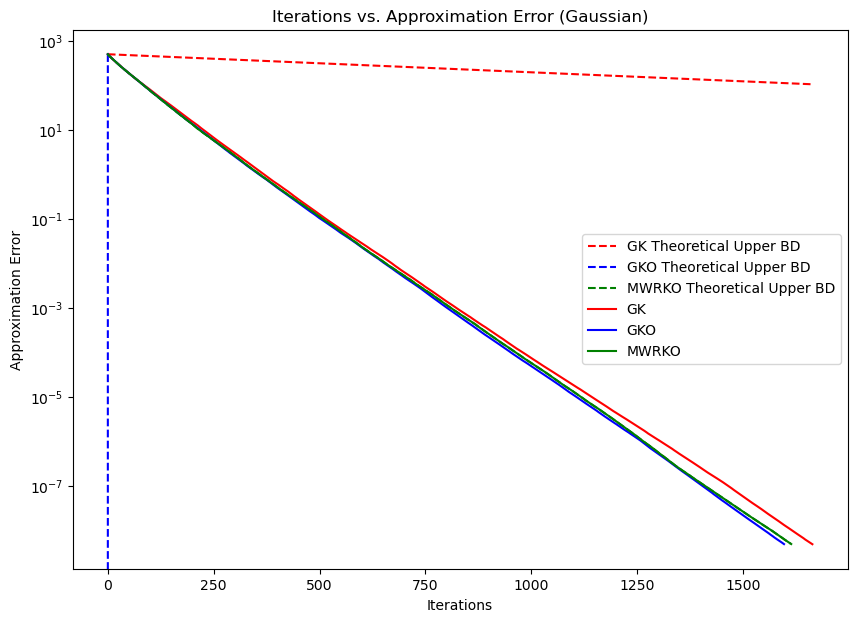

In [14]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gaussian[2])), gk_gaussian[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gaussian[2])), gko_gaussian[2], linestyle = 'dashed', 
            color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gaussian[2])), mwrko_gaussian[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gaussian[0]), gk_gaussian[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gaussian[0]), gko_gaussian[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gaussian[0]), mwrko_gaussian[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian)')
plt.legend()

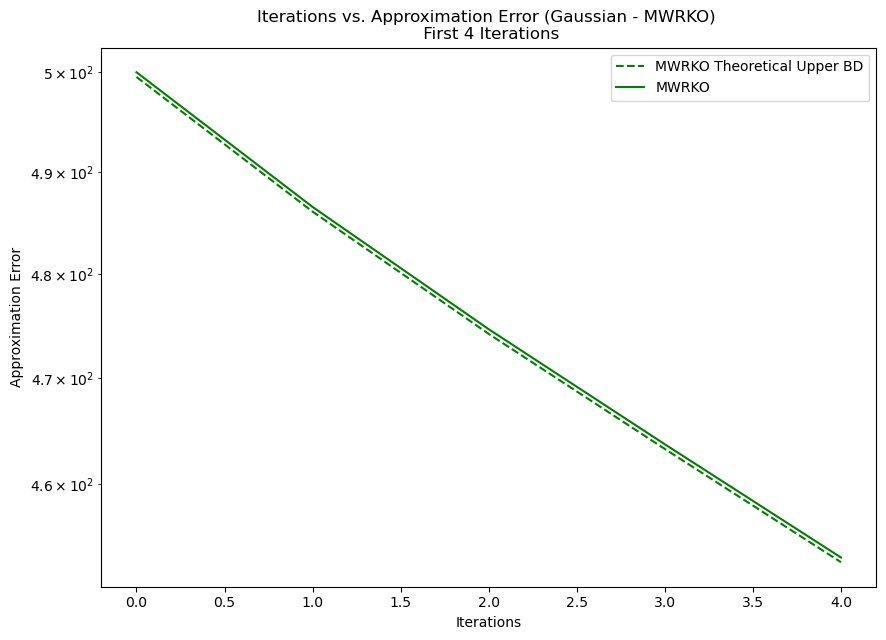

In [8]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gaussian[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gaussian[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Gaussian - MWRKO) \n First 4 Iterations')
plt.legend()

In [9]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gaussian[0]-9), mwrko_gaussian[0]+1)))
# empirical result data
e_result = list(mwrko_gaussian[1][0:10])
e_result.extend(list(mwrko_gaussian[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gaussian[2][0:10])
t_result.extend(list(mwrko_gaussian[2][-11:-1]))
# create and print df
mwrko_gauss_df = pd.DataFrame()
mwrko_gauss_df['k'] = k
mwrko_gauss_df['Theoretical BD'] = t_result
mwrko_gauss_df['Empirical Results'] = e_result
mwrko_gauss_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.596000e+03,1.597000e+03,1.598000e+03,1.599000e+03,1.600000e+03,1.601000e+03,1.602000e+03,1.603000e+03,1.604000e+03,1.605000e+03
Theoretical BD,499.524251,486.096040,474.221079,463.311493,452.820195,443.585548,434.280541,425.155984,416.679782,408.220584,5.862691e-09,5.777003e-09,5.690472e-09,5.609507e-09,5.525267e-09,5.447101e-09,5.371135e-09,5.290680e-09,5.211169e-09,5.125330e-09
Empirical Results,500.000000,486.559093,474.672910,463.752930,453.251636,444.008191,434.694318,425.561067,417.076789,408.609531,5.782507e-09,5.695894e-09,5.614852e-09,5.530531e-09,5.452291e-09,5.376253e-09,5.295721e-09,5.216134e-09,5.130214e-09,5.049660e-09


## Uniform System

In [10]:
# setting up data
A = np.random.uniform(size =(5000,500), low = 0, high = 1)
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [11]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [12]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [13]:
# Run algorithms
gk_uniform = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_uniform = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_uniform = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


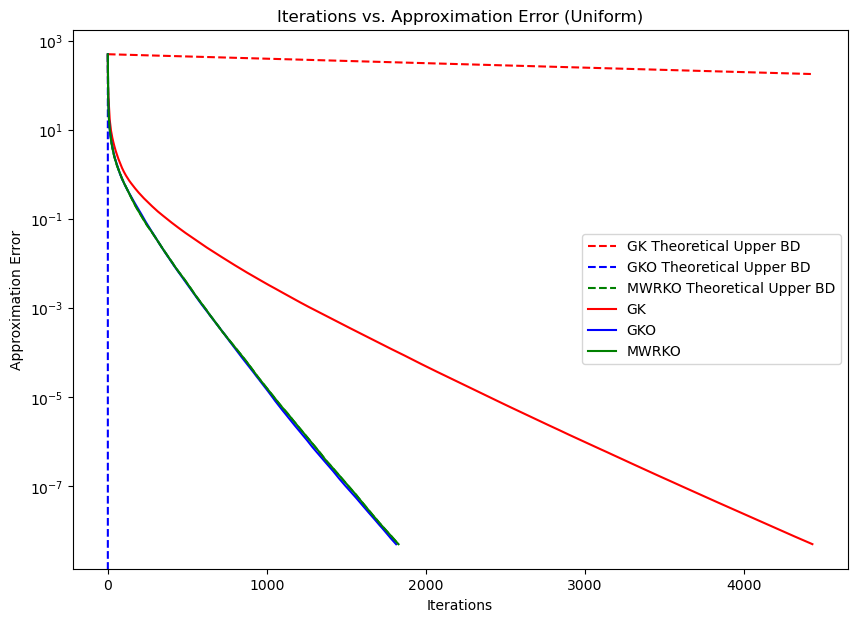

In [14]:
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_uniform[2])), gk_uniform[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_uniform[2])), gko_uniform[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_uniform[2])), mwrko_uniform[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_uniform[0]), gk_uniform[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_uniform[0]), gko_uniform[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_uniform[0]), mwrko_uniform[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform)')
plt.legend()

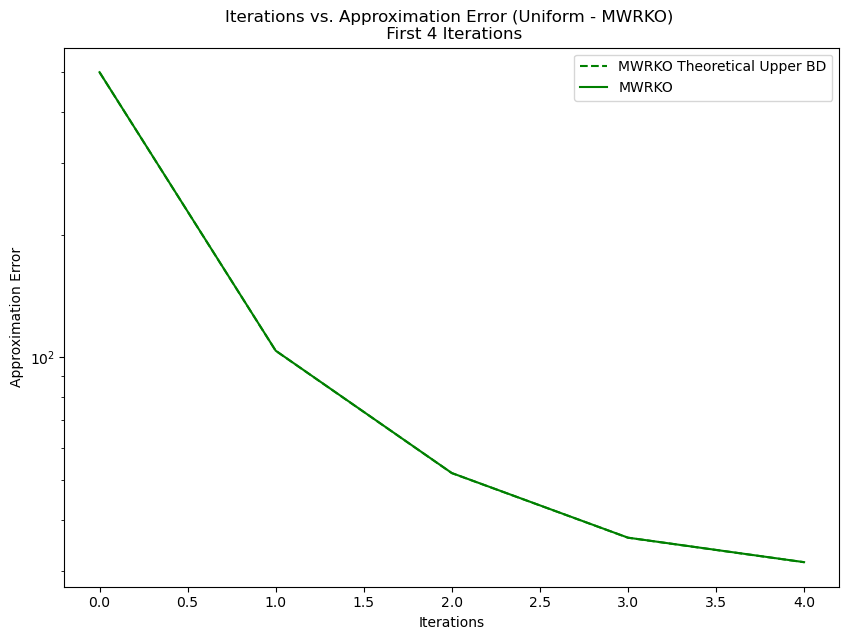

In [15]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_uniform[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_uniform[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Uniform - MWRKO) \n First 4 Iterations')
plt.legend()

In [16]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_uniform[0]-9), mwrko_uniform[0]+1)))
# empirical result data
e_result = list(mwrko_uniform[1][0:10])
e_result.extend(list(mwrko_uniform[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_uniform[2][0:10])
t_result.extend(list(mwrko_uniform[2][-11:-1]))
# create and print df
mwrko_uniform_df = pd.DataFrame()
mwrko_uniform_df['k'] = k
mwrko_uniform_df['Theoretical BD'] = t_result
mwrko_uniform_df['Empirical Results'] = e_result
mwrko_uniform_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.819000e+03,1.820000e+03,1.821000e+03,1.822000e+03,1.823000e+03,1.824000e+03,1.825000e+03,1.826000e+03,1.827000e+03,1.828000e+03
Theoretical BD,499.884275,103.761953,51.990514,36.099108,31.435987,24.830461,19.633369,17.537919,15.587881,13.575164,5.481414e-09,5.433316e-09,5.386516e-09,5.340219e-09,5.291620e-09,5.244309e-09,5.200693e-09,5.151557e-09,5.112372e-09,5.062094e-09
Empirical Results,500.000000,103.804568,52.011871,36.113937,31.448901,24.840661,19.641435,17.545124,15.594284,13.580740,5.435548e-09,5.388729e-09,5.342413e-09,5.293794e-09,5.246463e-09,5.202829e-09,5.153673e-09,5.114472e-09,5.064173e-09,5.021824e-09


## 50/50 Gauss-Uniform System

In [17]:
# setting up data
A1 = np.random.rand(2500,500)
A2 = np.random.randn(2500,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [18]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [20]:
# Run algorithms
gk_gu1 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu1 = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu1 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


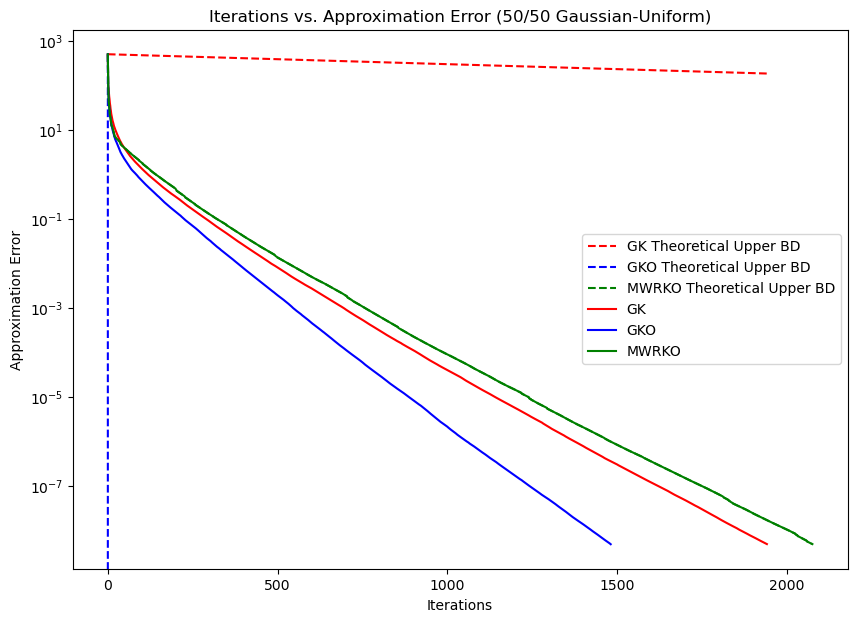

In [21]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu1[2])), gk_gu1[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu1[2])), gko_gu1[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu1[2])), mwrko_gu1[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gu1[0]), gk_gu1[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gu1[0]), gko_gu1[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gu1[0]), mwrko_gu1[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gaussian-Uniform)')
plt.legend()

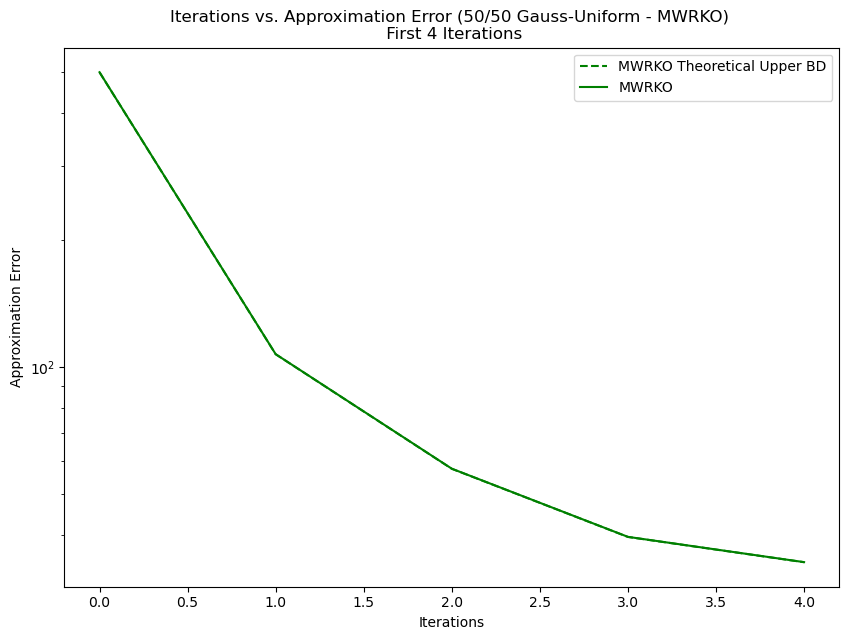

In [22]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gu1[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu1[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (50/50 Gauss-Uniform - MWRKO) \n First 4 Iterations')
plt.legend()

In [23]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu1[0]-9), mwrko_gu1[0]+1)))
# empirical result data
e_result = list(mwrko_gu1[1][0:10])
e_result.extend(list(mwrko_gu1[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu1[2][0:10])
t_result.extend(list(mwrko_gu1[2][-11:-1]))
# create and print df
mwrko_gu1_df = pd.DataFrame()
mwrko_gu1_df['k'] = k
mwrko_gu1_df['Theoretical BD'] = t_result
mwrko_gu1_df['Empirical Results'] = e_result
mwrko_gu1_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.00000,2.067000e+03,2.068000e+03,2.069000e+03,2.070000e+03,2.071000e+03,2.072000e+03,2.073000e+03,2.074000e+03,2.075000e+03,2.076000e+03
Theoretical BD,499.743017,107.296212,57.425640,39.589651,34.490857,27.518070,22.322745,20.233511,18.121448,15.91994,5.453562e-09,5.407548e-09,5.364493e-09,5.315358e-09,5.267162e-09,5.222192e-09,5.178413e-09,5.137019e-09,5.091786e-09,5.049769e-09
Empirical Results,500.000000,107.351398,57.455182,39.610017,34.508600,27.532226,22.334229,20.243919,18.130771,15.92813,5.410330e-09,5.367253e-09,5.318092e-09,5.269872e-09,5.224878e-09,5.181077e-09,5.139662e-09,5.094405e-09,5.052367e-09,5.010678e-09


## 75/25 Gauss-Uniform System

In [24]:
# setting up data
A1 = np.random.rand(1250,500)
A2 = np.random.randn(3750,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [25]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [26]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [27]:
# Run algorithms
gk_gu2 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu2 = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu2 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


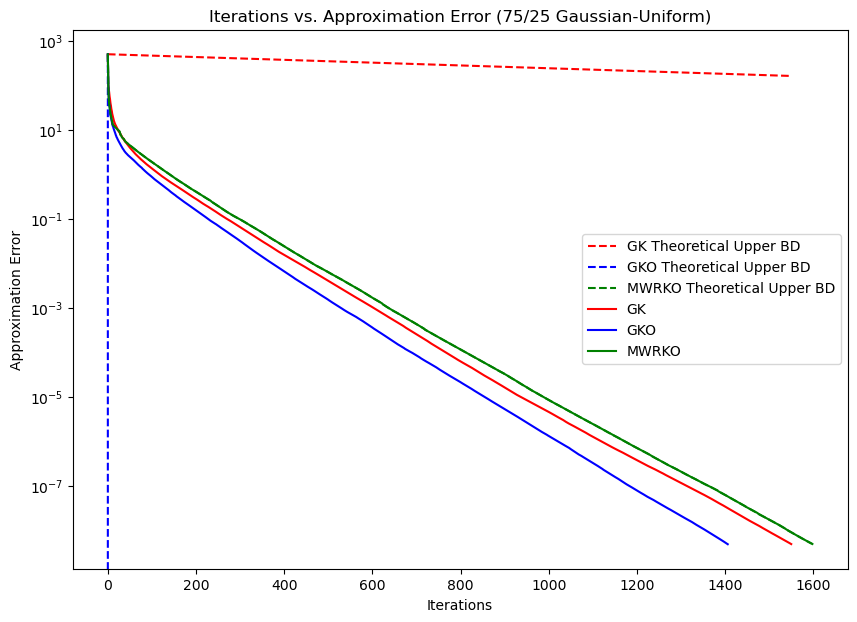

In [28]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu2[2])), gk_gu2[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu2[2])), gko_gu2[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu2[2])), mwrko_gu2[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gu2[0]), gk_gu2[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gu2[0]), gko_gu2[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gu2[0]), mwrko_gu2[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gaussian-Uniform)')
plt.legend()

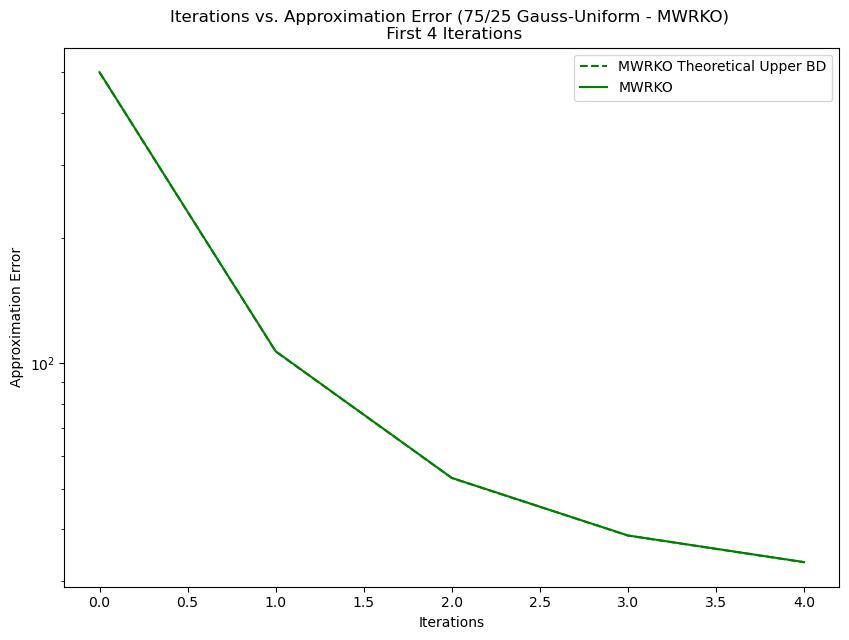

In [29]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gu2[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu2[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (75/25 Gauss-Uniform - MWRKO) \n First 4 Iterations')
plt.legend()

In [30]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu2[0]-9), mwrko_gu2[0]+1)))
# empirical result data
e_result = list(mwrko_gu2[1][0:10])
e_result.extend(list(mwrko_gu2[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu2[2][0:10])
t_result.extend(list(mwrko_gu2[2][-11:-1]))
# create and print df
mwrko_gu2_df = pd.DataFrame()
mwrko_gu2_df['k'] = k
mwrko_gu2_df['Theoretical BD'] = t_result
mwrko_gu2_df['Empirical Results'] = e_result
mwrko_gu2_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,1.590000e+03,1.591000e+03,1.592000e+03,1.593000e+03,1.594000e+03,1.595000e+03,1.596000e+03,1.597000e+03,1.598000e+03,1.599000e+03
Theoretical BD,499.637678,106.719777,52.976047,38.534980,33.257205,27.763403,22.661873,20.930796,18.630905,16.627174,5.700852e-09,5.631682e-09,5.562429e-09,5.493878e-09,5.424641e-09,5.354675e-09,5.287620e-09,5.226848e-09,5.163744e-09,5.105873e-09
Empirical Results,500.000000,106.797183,53.014479,38.562936,33.281332,27.783545,22.678313,20.945980,18.644420,16.639237,5.635768e-09,5.566464e-09,5.497864e-09,5.428577e-09,5.358559e-09,5.291456e-09,5.230640e-09,5.167490e-09,5.109578e-09,5.050672e-09


## 25/75 Gauss-Uniform System

In [31]:
# setting up data
A1 = np.random.rand(3750,500)
A2 = np.random.randn(1250,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [32]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
max_angle_g = max(angles_g)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)
max_row_norm_g = max(row_norm_g)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [33]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [34]:
# Run algorithms
gk_gu3 = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_gu3 = method2(A,x,y,'GKO', LHk_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_gu3 = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


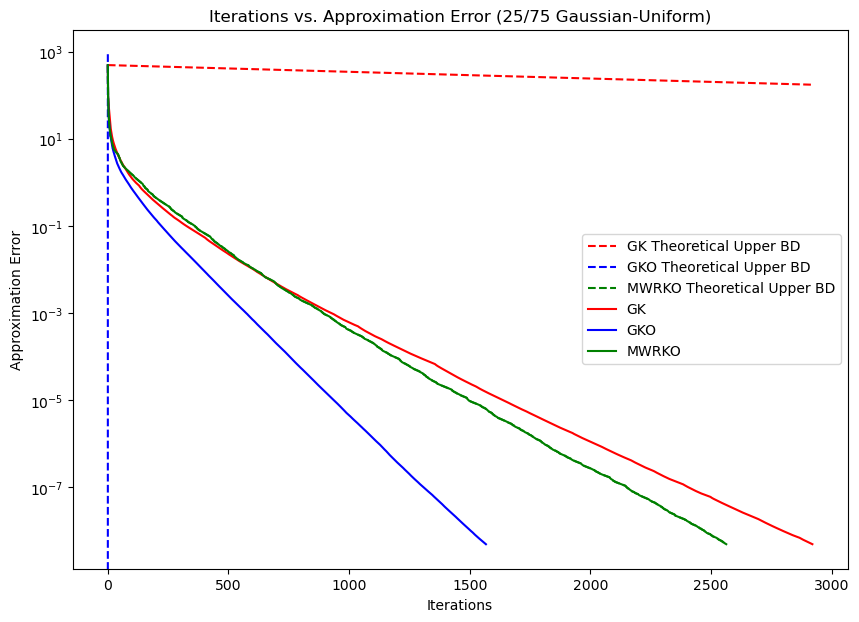

In [35]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_gu3[2])), gk_gu3[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_gu3[2])), gko_gu3[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_gu3[2])), mwrko_gu3[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_gu3[0]), gk_gu3[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gu3[0]), gko_gu3[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_gu3[0]), mwrko_gu3[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gaussian-Uniform)')
plt.legend()

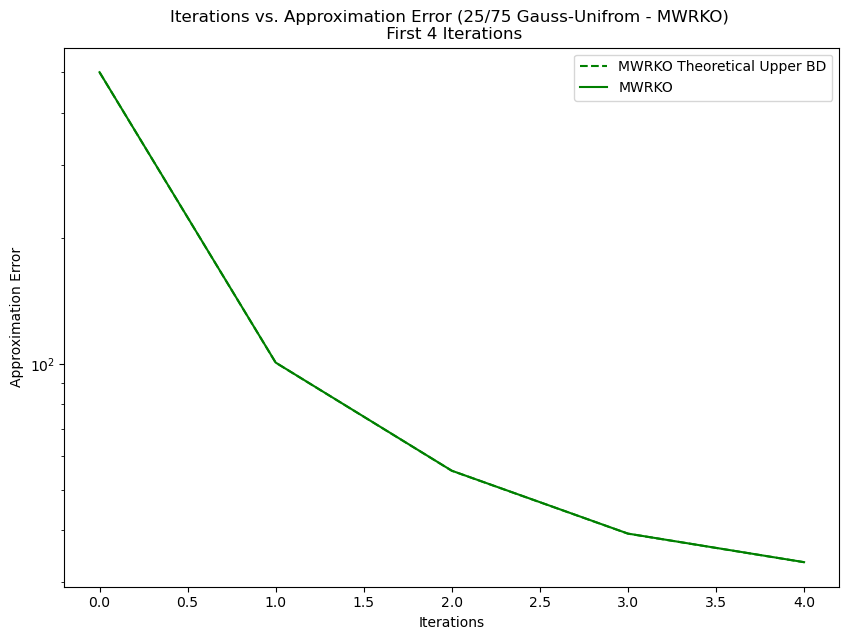

In [36]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_gu3[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_gu3[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (25/75 Gauss-Unifrom - MWRKO) \n First 4 Iterations')
plt.legend()

In [37]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_gu3[0]-9), mwrko_gu3[0]+1)))
# empirical result data
e_result = list(mwrko_gu3[1][0:10])
e_result.extend(list(mwrko_gu3[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_gu3[2][0:10])
t_result.extend(list(mwrko_gu3[2][-11:-1]))
# create and print df
mwrko_gu3_df = pd.DataFrame()
mwrko_gu3_df['k'] = k
mwrko_gu3_df['Theoretical BD'] = t_result
mwrko_gu3_df['Empirical Results'] = e_result
mwrko_gu3_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.00000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,2.555000e+03,2.556000e+03,2.557000e+03,2.558000e+03,2.559000e+03,2.560000e+03,2.561000e+03,2.562000e+03,2.563000e+03,2.564000e+03
Theoretical BD,499.82241,100.694961,55.441123,39.189412,33.474340,27.008645,21.814834,19.681604,17.446301,15.412858,5.462935e-09,5.430623e-09,5.402951e-09,5.337666e-09,5.267194e-09,5.238639e-09,5.166934e-09,5.137097e-09,5.106954e-09,5.077154e-09
Empirical Results,500.00000,100.730746,55.460829,39.203342,33.486239,27.018246,21.822588,19.688600,17.452502,15.418336,5.432554e-09,5.404871e-09,5.339563e-09,5.269067e-09,5.240501e-09,5.168771e-09,5.138923e-09,5.108769e-09,5.078959e-09,5.014165e-09


## Two Highly Correlated Systems

In [38]:
# setting up data
# Step 1: generate two gaussian linear system
A = np.random.randn(2,500)
A1 = np.reshape(A[0,:], (1, 500))
A2 = np.reshape(A[1,:], (1, 500))
# Step 2: generate correalted systems
U = np.random.uniform(low = 0, high = 1, size  = (2500,500))
A1 =  np.tile(A1, (2500, 1)) +  U
A2 =  np.tile(A2, (2500, 1)) +  U
# Step 3: Combine two correlated systems
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [39]:
# Compute LH of convergence rate
# gk (LH1 = LH2 = 0)
LHk_gk = 1- ( S2_min / m )
# gko
LH1_gko = 1 - ( S2_min / m )
#LH2_gko = S2_min / (max_angle_g * (m-1)) )
LHk_gko = S2_min / max_angle_g 
# mwrko
LH1_mwrko = 1 - ( S2_min / m )
LH2_mwrko = 1- ( S2_min / (max_angle_g * (m-1)) )
LHk_mwrko =  1- ( S2_min / (max_angle_g * (m-2)) )

In [40]:
# Run algorithms
gk_corr = method2(A,x,y,'GK', 0, 0, LHk_gk, 0.5*10**-8)
gko_corr = method2(A,x,y,'GKO', LH1_gko, LHk_gko, LHk_gko, 0.5*10**-8)
mwrko_corr = method2(A,x,y,'MWRKO', LH1_mwrko, LH2_mwrko, LHk_mwrko,0.5*10**-8)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


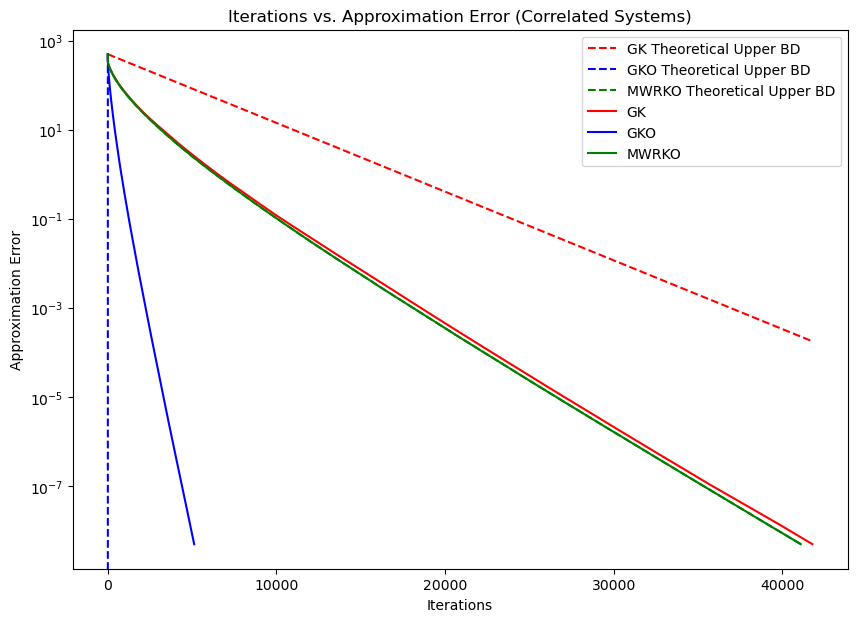

In [41]:
# plot the results with the theoretical upper bound
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(len(gk_corr[2])), gk_corr[2], linestyle = 'dashed',
             color = "red", label = 'GK Theoretical Upper BD')
plt.semilogy(np.arange(len(gko_corr[2])), gko_corr[2], linestyle = 'dashed', 
             color = "blue", label = 'GKO Theoretical Upper BD')
plt.semilogy(np.arange(len(mwrko_corr[2])), mwrko_corr[2], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(gk_corr[0]), gk_corr[1], 
             color = "red", linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_corr[0]), gko_corr[1], linestyle = 'solid', 
             color = "blue", label = 'GKO')
plt.semilogy(np.arange(mwrko_corr[0]), mwrko_corr[1], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems)')
plt.legend()

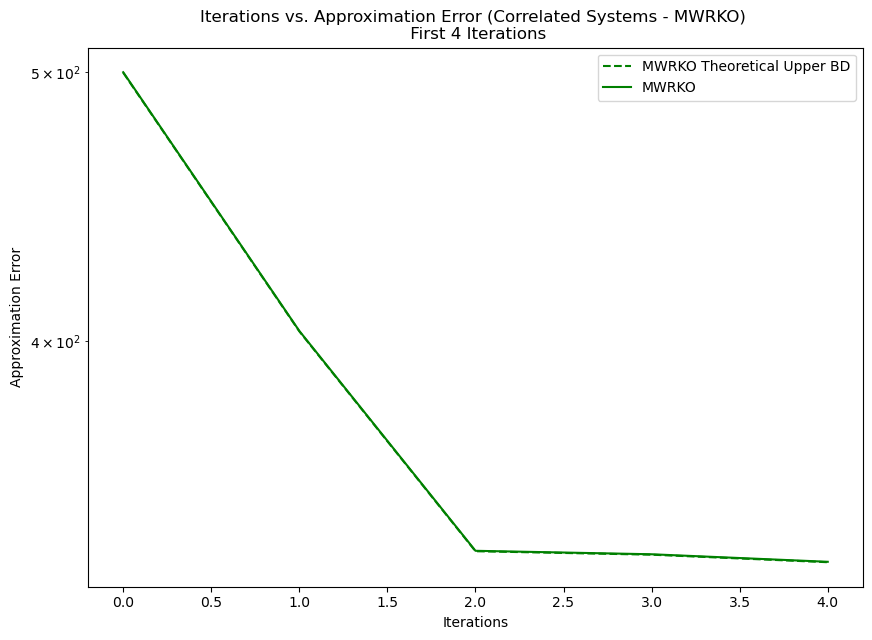

In [42]:
# Show MWRKO empirical and theoretical results
plt.figure(figsize=(10,7))
# plot theoretical bound
plt.semilogy(np.arange(5), mwrko_corr[2][0:5], linestyle = 'dashed', 
             color = "green", label = 'MWRKO Theoretical Upper BD')
# plot empirical results
plt.semilogy(np.arange(5), mwrko_corr[1][0:5], linestyle = 'solid', 
             color = "green", label = 'MWRKO')
# labels
plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Correlated Systems - MWRKO) \n First 4 Iterations')
plt.legend()

In [43]:
# table
k = list(range(1,11))
k.extend(list(range((mwrko_corr[0]-9), mwrko_corr[0]+1)))
# empirical result data
e_result = list(mwrko_corr[1][0:10])
e_result.extend(list(mwrko_corr[1][-11:-1]))
# theoretical result data
t_result = list(mwrko_corr[2][0:10])
t_result.extend(list(mwrko_corr[2][-11:-1]))
# create and print df
mwrko_corr_df = pd.DataFrame()
mwrko_corr_df['k'] = k
mwrko_corr_df['Theoretical BD'] = t_result
mwrko_corr_df['Empirical Results'] = e_result
mwrko_corr_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k,1.00000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,4.108500e+04,4.108600e+04,4.108700e+04,4.108800e+04,4.108900e+04,4.109000e+04,4.109100e+04,4.109200e+04,4.109300e+04,4.109400e+04
Theoretical BD,499.82241,403.136919,335.820366,334.853106,332.765081,330.942772,329.257124,327.684169,326.213301,324.828801,5.026446e-09,5.023853e-09,5.021233e-09,5.018602e-09,5.015987e-09,5.013387e-09,5.010808e-09,5.008233e-09,5.005625e-09,5.003034e-09
Empirical Results,500.00000,403.280184,335.939732,334.972129,332.883361,331.060405,329.374158,327.800644,326.329253,324.944261,5.025639e-09,5.023018e-09,5.020386e-09,5.017769e-09,5.015169e-09,5.012589e-09,5.010013e-09,5.007404e-09,5.004812e-09,5.002231e-09
